In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

In [2]:
dataset_url="https://raw.githubusercontent.com/frimpong-adotri-01/datasets/main/iris_dataset.csv"

In [31]:
data = pd.read_csv(filepath_or_buffer=dataset_url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **PRE-PROCESSING**

In [4]:
# Checking NaN values
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
print(f"Number of each species :")
data["species"].value_counts()

Number of each species :


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
# Label Encoding
labels = np.unique(data["species"])
data["species"] = data["species"].apply(lambda specy: np.where(labels==specy)[0][0])
print(f"Number of each species :")
data["species"].value_counts()

Number of each species :


0    50
1    50
2    50
Name: species, dtype: int64

In [7]:
# Split the data into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(data.drop("species", axis=1), data["species"], test_size=.2)

### **Model trainning**

In [9]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### **Amélioration du modèle**

In [12]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

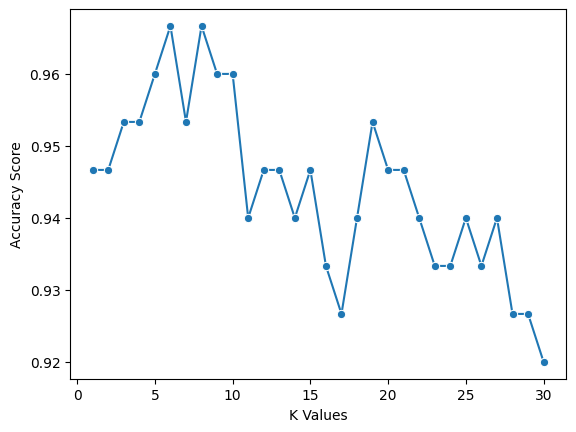

In [13]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [14]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [18]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9666666666666667
Precision: 0.9692307692307692
Recall: 0.9666666666666667


### **Model saving**

In [19]:
pickle.dump(best_model, open('iris_model.pkl', 'wb'))

In [30]:
#pickled_model = pickle.load(open('iris_model.pkl', 'rb'))

#labels[pickled_model.predict(np.array([[6.5,	3.0,	5.2, 2.0]]))[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Iris-virginica'